In [1]:
import numpy as np
import scipy

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
x = np.linspace(0, 10, 100)

y = np.sin(np.sqrt(x)) + 0.1 * np.random.normal(0, 1, x.shape)

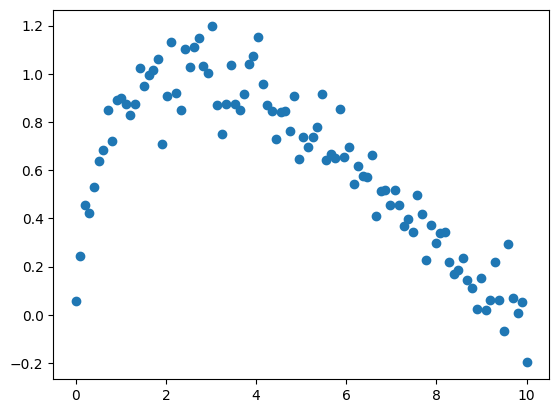

In [7]:
plt.scatter(x, y)

$$y \approx \sum_{i=1}^{d} a_i x_i \longrightarrow y \approx \sum_{i=1}^{d} a_i \phi_i(x)$$

$$\phi_i(x) = e^{-\epsilon(x - c_i)^2}$$

In [8]:
def gauss(x, c, eps=1):
    return np.exp(-eps*(x-c)**2)

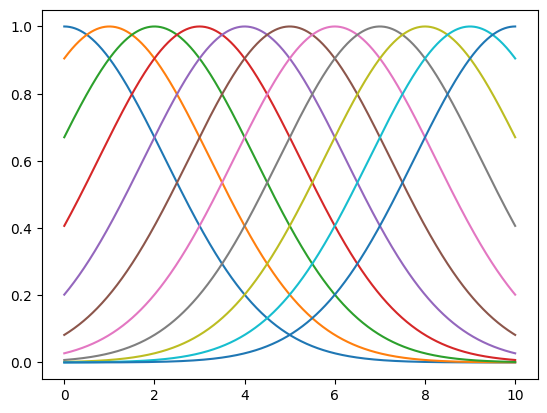

In [15]:
centers = [i for i in range(11)]

for center in centers:
    plt.plot(np.linspace(0, 10, 1000), 
             gauss(np.linspace(0, 10, 1000), center, eps=.1))

In [17]:
Phi = np.empty((x.shape[0], len(centers)))

print(Phi.shape)

for i in range(Phi.shape[0]):
    for j in range(Phi.shape[1]):
        Phi[i, j] = gauss(x[i], centers[j], eps=0.2)

(100, 11)


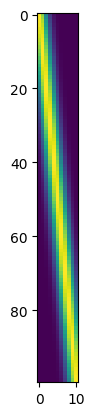

In [20]:
plt.imshow(Phi);

In [21]:
a = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y

In [22]:
a

array([-10.81291839,  30.13437072, -47.90455572,  60.71830945,
       -64.56008554,  62.15567833, -53.38667838,  41.52144393,
       -27.3177217 ,  14.10585355,  -4.37954447])

In [23]:
f = 0

for i in range(len(centers)):
    f += a[i] * gauss(x, centers[i], eps=0.2)

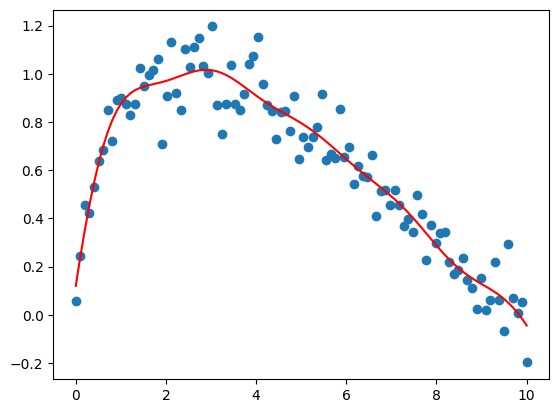

In [27]:
plt.scatter(x, y)
plt.plot(x, f, c='r');